In [121]:
import os
import time
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [122]:
path = os.getcwd() + "/STFT_npy_dataset/"
path

'd:\\Study\\Code\\Python\\Sound_Classification_Bee_Qeen_Queenless/STFT_npy_dataset/'

In [123]:
TRAINING_DIR = path+"/train"
VALIDATION_DIR = path + "/val"
TEST_DIR = path + "/test"

print(TRAINING_DIR)
print(VALIDATION_DIR)
print(TEST_DIR)

d:\Study\Code\Python\Sound_Classification_Bee_Qeen_Queenless/STFT_npy_dataset//train
d:\Study\Code\Python\Sound_Classification_Bee_Qeen_Queenless/STFT_npy_dataset//val
d:\Study\Code\Python\Sound_Classification_Bee_Qeen_Queenless/STFT_npy_dataset//test


In [124]:
def data_loader(path):
    X = []
    Y = []
    for folder in os.listdir(path):
        for file in os.listdir(os.path.join(path, folder)):
            feature = np.load(os.path.join(path, folder, file))
            label = folder
            X += feature.tolist()
            Y += [label]*feature.shape[0]
    return X, Y

In [125]:
X_train, Y_train = data_loader(TRAINING_DIR)
X_val, Y_val = data_loader(VALIDATION_DIR)
X_test, Y_test = data_loader(TEST_DIR)

In [126]:
print("There are {} training samples and {} training labels".format(len(X_train), len(Y_train)))
print("There are {} validation samples and {} validation labels".format(len(X_val), len(Y_val)))
print("There are {} testing samples and {} testing labels".format(len(X_test), len(Y_test)))

There are 14000 training samples and 14000 training labels
There are 2000 validation samples and 2000 validation labels
There are 4000 testing samples and 4000 testing labels


In [127]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_val = np.array(Y_val)
Y_test = np.array(Y_test)

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_val: {}".format(X_val.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of Y_train: {}".format(Y_train.shape))
print("Shape of Y_val: {}".format(Y_val.shape))
print("Shape of Y_test: {}".format(Y_test.shape))

Shape of X_train: (14000, 1506)
Shape of X_val: (2000, 1506)
Shape of X_test: (4000, 1506)
Shape of Y_train: (14000,)
Shape of Y_val: (2000,)
Shape of Y_test: (4000,)


In [128]:
X_test = np.vstack((X_test, X_val))
Y_test = np.hstack((Y_test, Y_val))
Y_train = Y_train.reshape((Y_train.shape[0], 1))
Y_test = Y_test.reshape((Y_test.shape[0], 1))


print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of Y_train: {}".format(Y_train.shape))
print("Shape of Y_test: {}".format(Y_test.shape))

Shape of X_train: (14000, 1506)
Shape of X_test: (6000, 1506)
Shape of Y_train: (14000, 1)
Shape of Y_test: (6000, 1)


In [129]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

In [130]:
shuffle_index = np.random.permutation(len(X_train))
X_train, Y_train = X_train[shuffle_index], Y_train[shuffle_index]
shuffle_index = np.random.permutation(len(X_test))
X_test, Y_test = X_test[shuffle_index], Y_test[shuffle_index]

In [131]:
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_test = label_encoder.transform(Y_test)
np.unique(Y_test)

array([0, 1])

In [132]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)
print(X_train.shape)
print(X_train[0:5,:])

(14000, 1506)
[[-0.20625593 -0.20037969 -0.13927203 ... -0.30346418  0.02190123
   0.22686697]
 [-0.37546781 -0.41519121 -0.42357166 ... -0.4916865  -0.48752151
  -0.42151086]
 [-0.26030587 -0.20121527 -0.14613958 ... -0.37205555 -0.26258837
  -0.10040955]
 [-0.33945073 -0.35857294 -0.37082341 ... -0.21214505 -0.16714089
  -0.0266538 ]
 [ 0.22710471  0.44657535  0.9026507  ...  1.09630889  0.99937056
   0.74014353]]


In [133]:
model = SVC(random_state= 1337)
model.fit(X_train, Y_train)

SVC(random_state=1337)

In [134]:
Y_pred = model.predict(X_test)

In [135]:
Y_pred[:5], Y_test[:5]

(array([1, 1, 1, 1, 1], dtype=int64), array([1, 1, 1, 0, 1]))

In [136]:
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 76.65%


In [137]:
cf_matrix = confusion_matrix(Y_test, Y_pred)
print(cf_matrix)
cl_report = classification_report(Y_test, Y_pred)
print(cl_report)

[[2123  877]
 [ 524 2476]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      3000
           1       0.74      0.83      0.78      3000

    accuracy                           0.77      6000
   macro avg       0.77      0.77      0.77      6000
weighted avg       0.77      0.77      0.77      6000



In [138]:
def plot_confusion_matrix(cm, title='Confusion matrix'):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14}, cbar=True)
    plt.title(title, fontsize=20)
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()


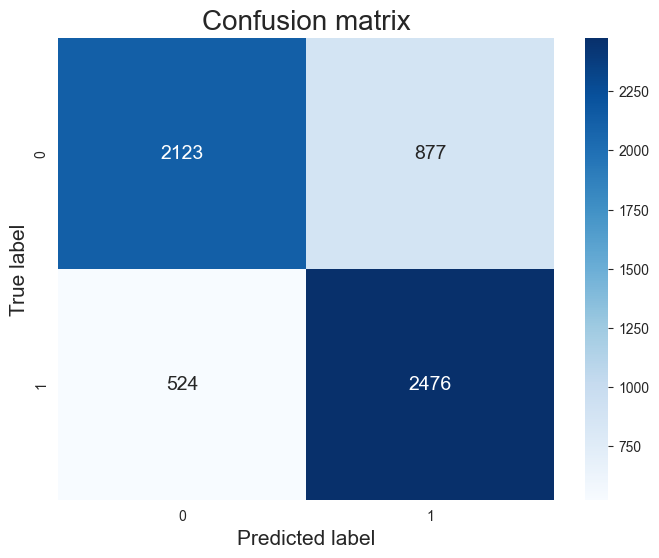

In [139]:
cf_matrix = confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cf_matrix)

In [140]:
os.chdir(os.path.join(os.getcwd()))
import pickle

# save 
with open('model_1D_STFT_EX0.pkl', 'wb') as f:
    pickle.dump(model, f)